In [1]:
from patchify import patchify
from PIL import Image
import torch
import torchvision
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np

In [2]:
tf = torchvision.transforms.ToTensor()

In [3]:
img = Image.open("../../data/roundshot/acbdefc4ab9401cd8ae0c16b3d25aa58/acbdefc4ab9401cd8ae0c16b3d25aa58_2024-11-01_1200.jpeg")
# img = Image.open("../../data/roundshot/f4406cdad80c1cf096c88bf163123cb8/f4406cdad80c1cf096c88bf163123cb8_2024-11-03_1400.jpeg")
image = np.array(img)
H, W, C = image.shape

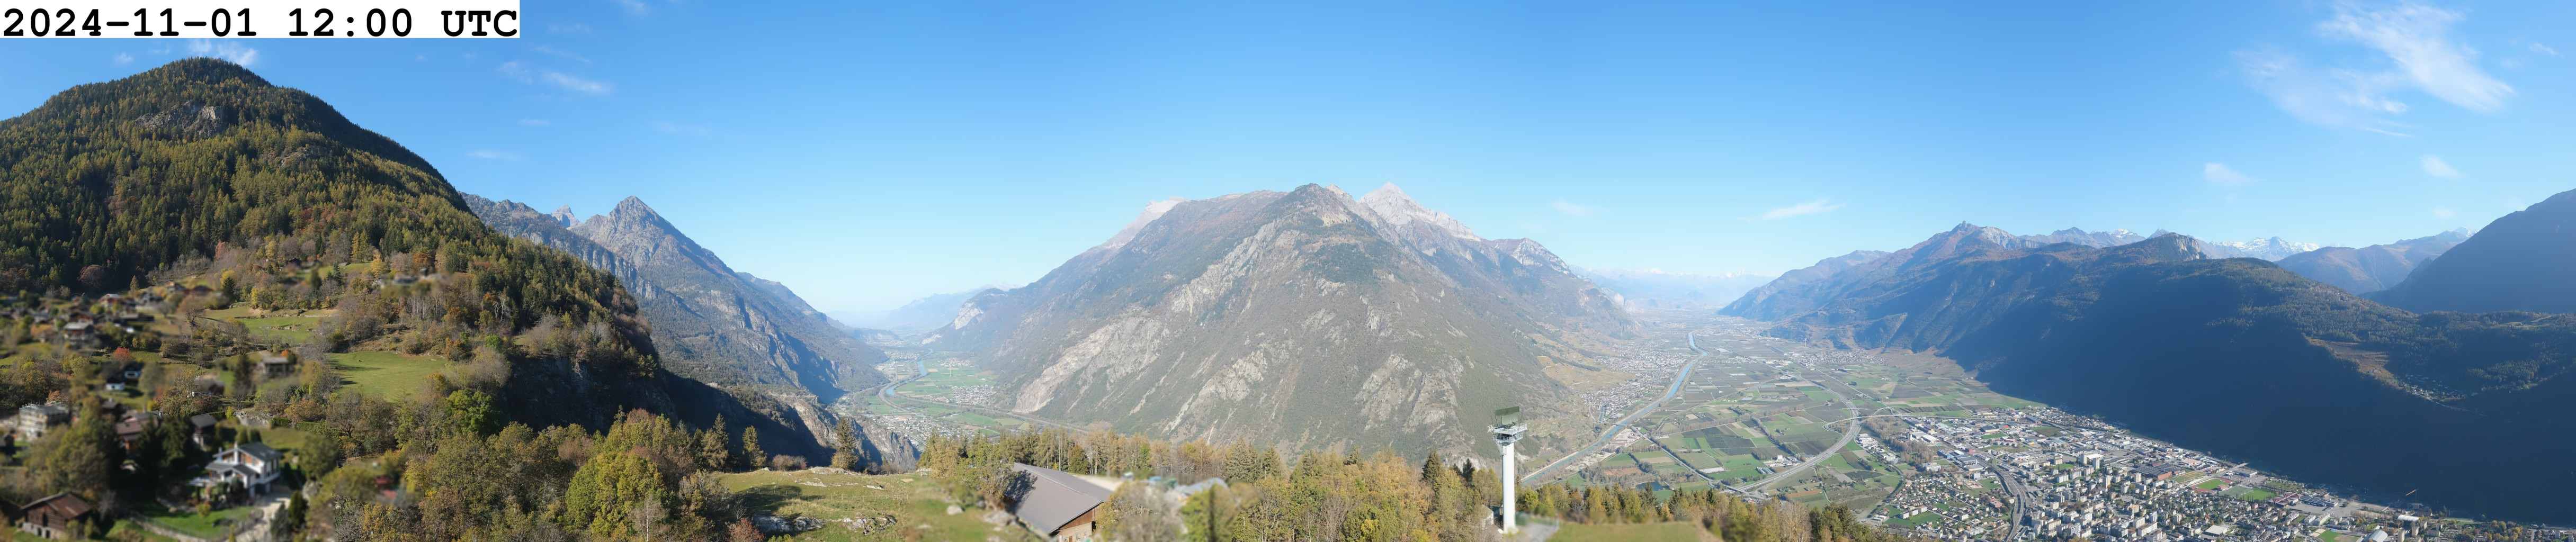

In [4]:
img

In [5]:
# Patchify
patch_size = 128
patches = patchify(image, (patch_size, patch_size, 3), step=patch_size)
patches = patches.reshape((H // patch_size) * (W // patch_size), patch_size, patch_size, 3)
patches_t = torch.Tensor(patches)

In [6]:
grid = make_grid(patches_t, nrow=W//patch_size)
ndarr = grid.permute(1, 2, 0).to('cpu').numpy()

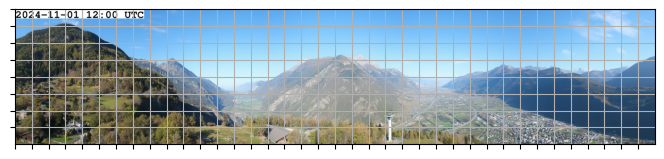

In [7]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
locx = plticker.MultipleLocator(base=128)
locy = plticker.MultipleLocator(base=128)
ax.xaxis.set_major_locator(locx)
ax.yaxis.set_major_locator(locy)
ax.grid(which='major', axis='both', linestyle='-')
ax.imshow(img)
ax.get_xaxis().set_ticklabels([]);
ax.get_yaxis().set_ticklabels([]);
# plt.savefig("ravoire_patches_1200.png", bbox_inches="tight", pad_inches=0, dpi=300)
